# Лабораторная работа №2

## Предметная область
Датасет содержит информацию о различных харакетристиках воды в водоемах, чтобы понять уровень ее загрязнения и пригодности для потребления.

## Источник и характер данных
https://www.kaggle.com/datasets/adityakadiwal/water-potability

Данные являются имитационными.

## Добавление нового атрибута
Сначала выведем датасет и удалим пропущенные значения:

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

df = pd.read_csv("./water_potability.csv")
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Добавим новый атрибут: количество химических веществ в воде (миллиграмм на литр) (Chemicals). Chemicals = Chloramines + Sulfate + Organic_carbon + Trihalomethanes

In [4]:
list = []
for i, row in df.iterrows():
    chloramines = row['Chloramines']
    sulfate = row['Sulfate']
    carbon = row['Organic_carbon']
    trihal = row['Trihalomethanes']
    chemicals = chloramines + sulfate + carbon + trihal
    list.append(chemicals)

chemicals = pd.Series(list)
df.insert(0, "Chemicals", chemicals)

In [6]:
df.head()

,Chemicals,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,499.570055,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,383.034906,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,503.023242,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,428.501880,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,381.380401,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chemicals        1238 non-null   float64
 1   ph               2011 non-null   float64
 2   Hardness         2011 non-null   float64
 3   Solids           2011 non-null   float64
 4   Chloramines      2011 non-null   float64
 5   Sulfate          2011 non-null   float64
 6   Conductivity     2011 non-null   float64
 7   Organic_carbon   2011 non-null   float64
 8   Trihalomethanes  2011 non-null   float64
 9   Turbidity        2011 non-null   float64
 10  Potability       2011 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 188.5 KB


Атрибут добавлен в датасет.

## "Причёсывание" датасета
Пропущенные значения мы уже удалили, теперь удалим выбросы:

In [11]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    print(f"Колонка {col} - {outliers_count} выбросов")

df_filtered = df.copy()
for col in df_filtered.columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

df_filtered.info()

Колонка Chemicals - 20 выбросов
Колонка ph - 31 выбросов
Колонка Hardness - 49 выбросов
Колонка Solids - 28 выбросов
Колонка Chloramines - 43 выбросов
Колонка Sulfate - 37 выбросов
Колонка Conductivity - 7 выбросов
Колонка Organic_carbon - 14 выбросов
Колонка Trihalomethanes - 22 выбросов
Колонка Turbidity - 11 выбросов
Колонка Potability - 0 выбросов
<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 3 to 2010
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chemicals        1076 non-null   float64
 1   ph               1076 non-null   float64
 2   Hardness         1076 non-null   float64
 3   Solids           1076 non-null   float64
 4   Chloramines      1076 non-null   float64
 5   Sulfate          1076 non-null   float64
 6   Conductivity     1076 non-null   float64
 7   Organic_carbon   1076 non-null   float64
 8   Trihalomethanes  1076 non-null   float64
 9   Turbidity        1076 non-null   

Все выбросы были удалены

## Построение графиков зависимости

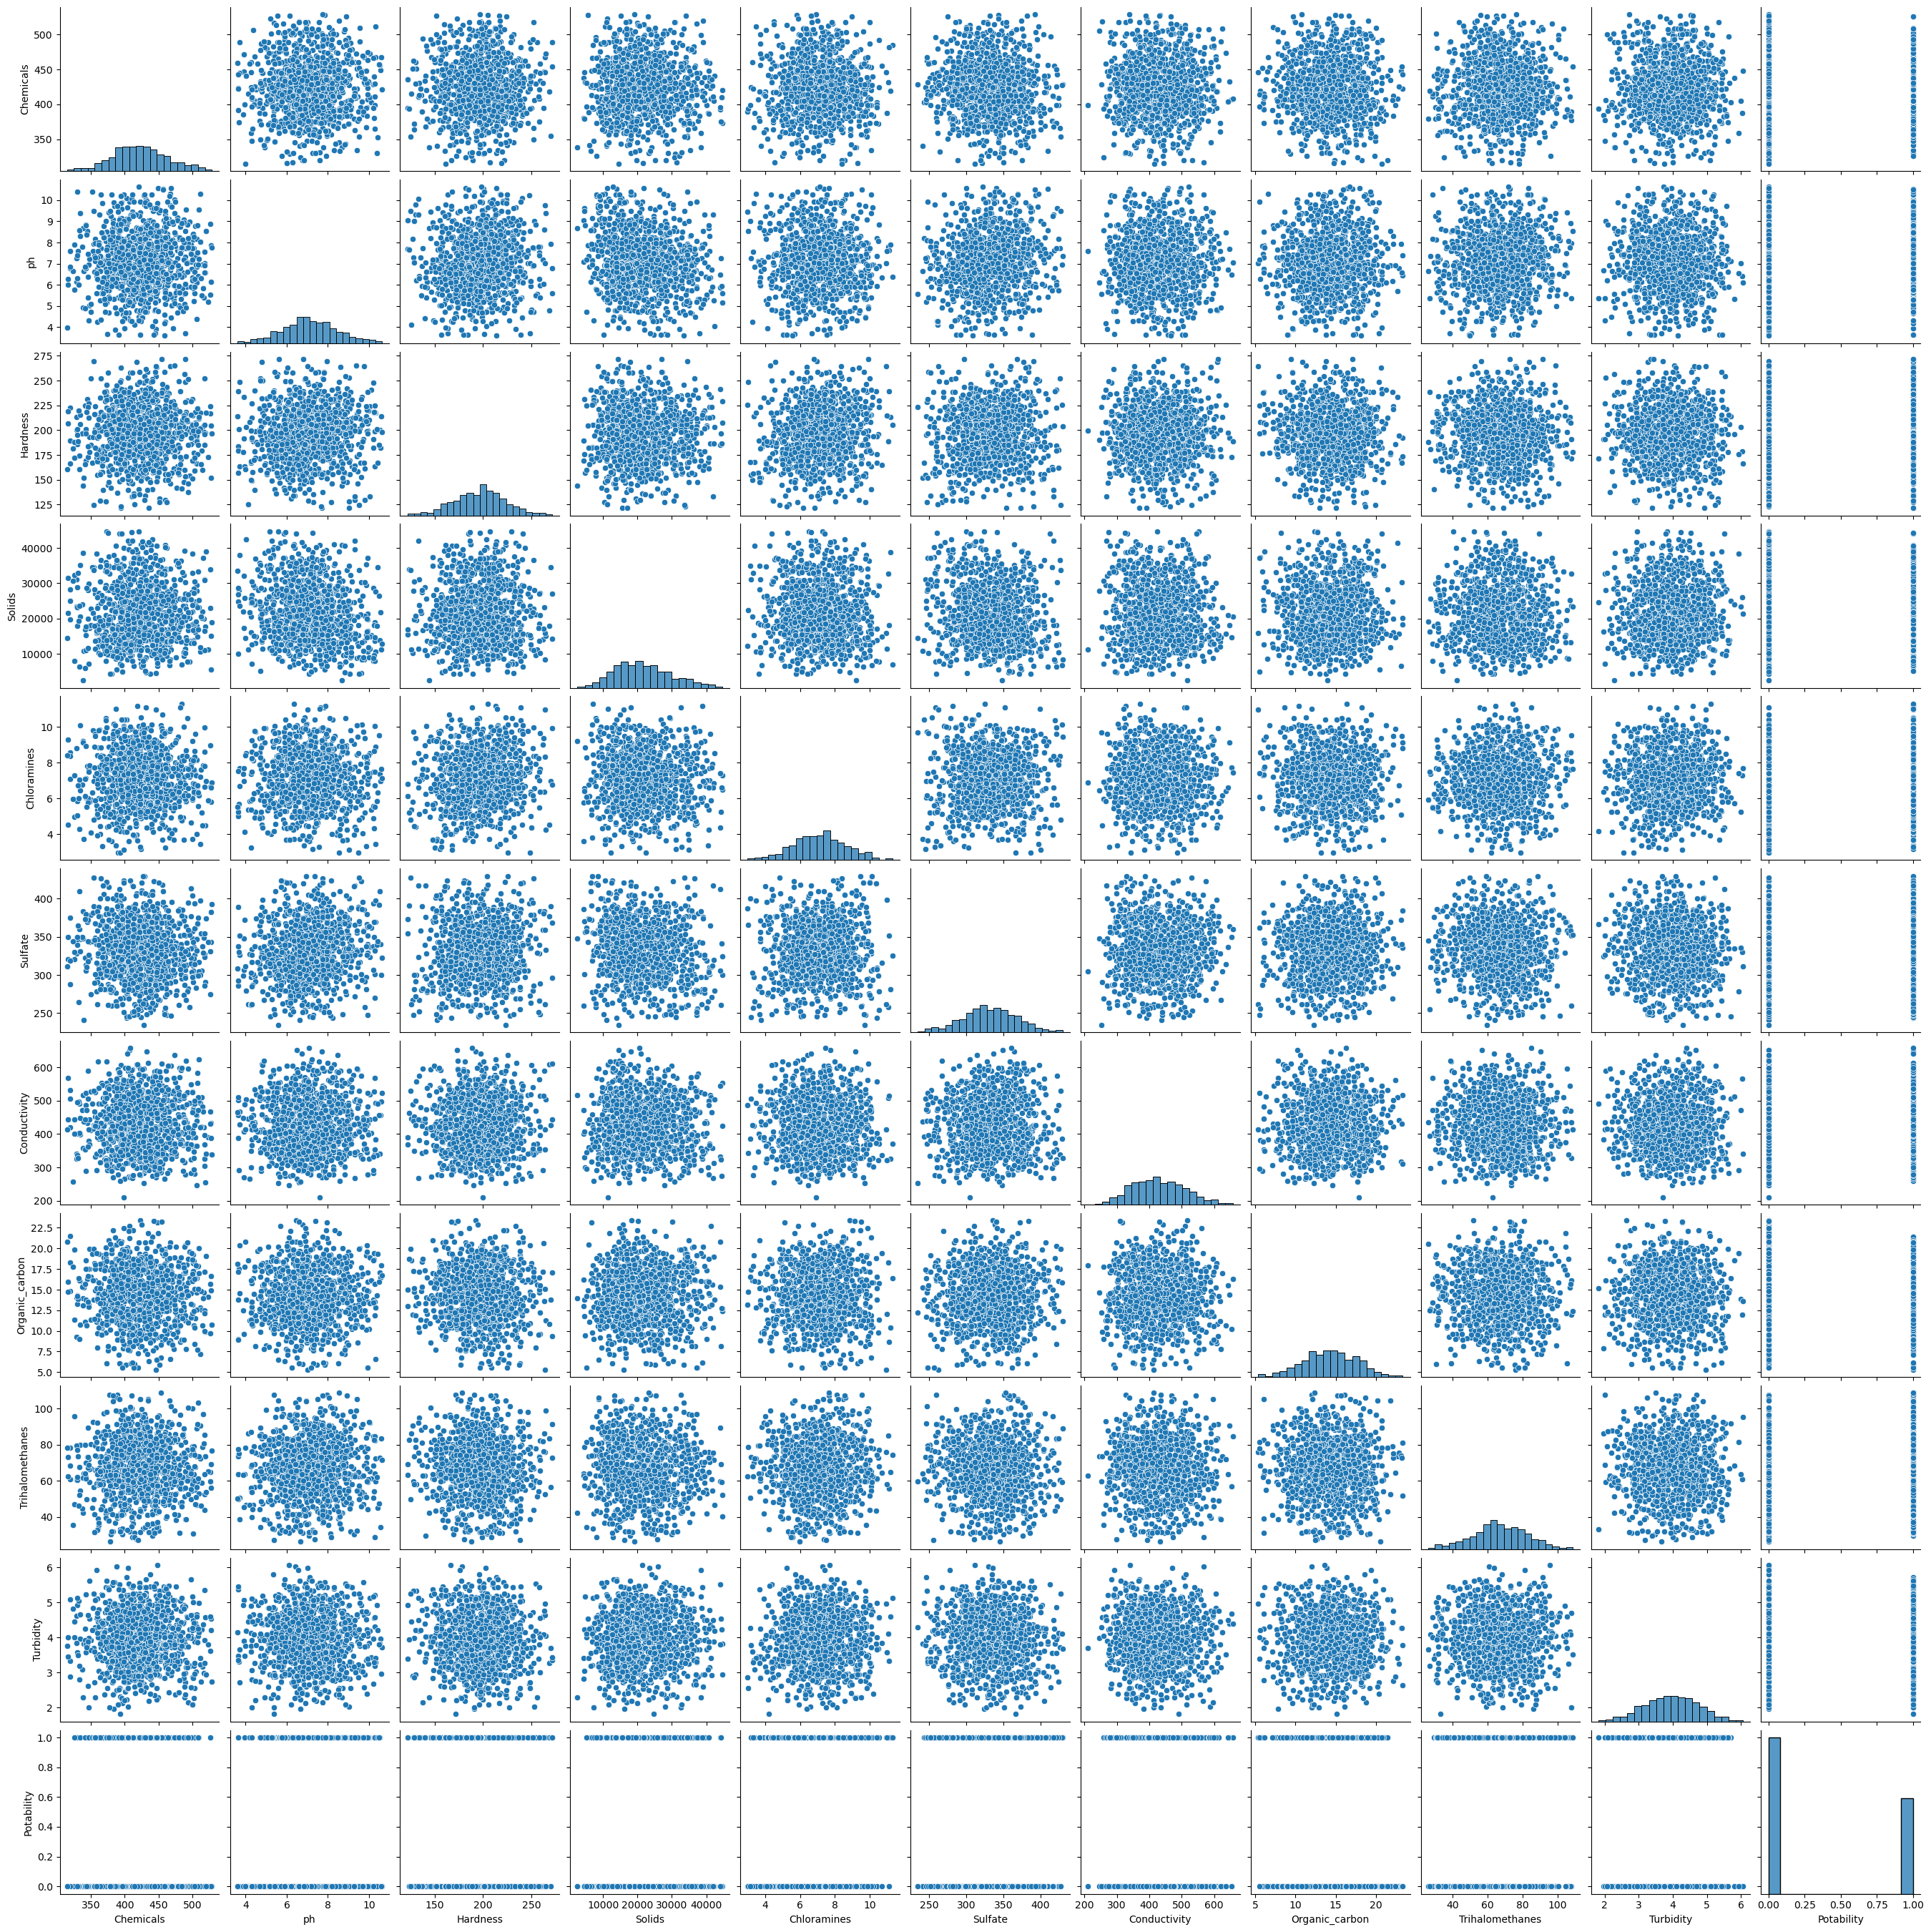

In [14]:
sns.pairplot(df_filtered)
plt.show()

По данным графикам нельзя точно определить какие-либо кластеры.

## K-Means и визуализация кластеров

Применим метод K-Means (снижение размерности числа кластеров), а затем визуализируем наши кластеры по всем атрибутам с помощью PCA.

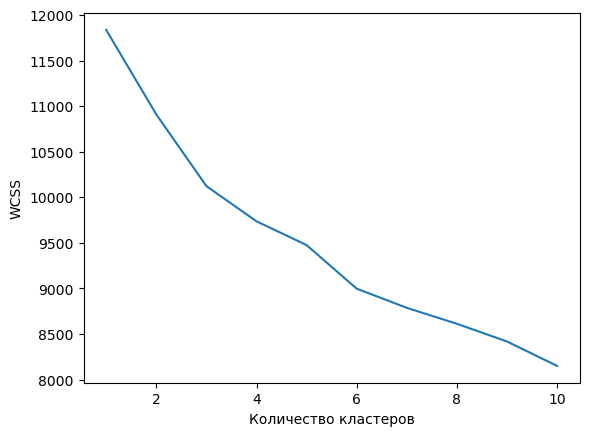

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df_filtered['Cluster'] = kmeans.labels_

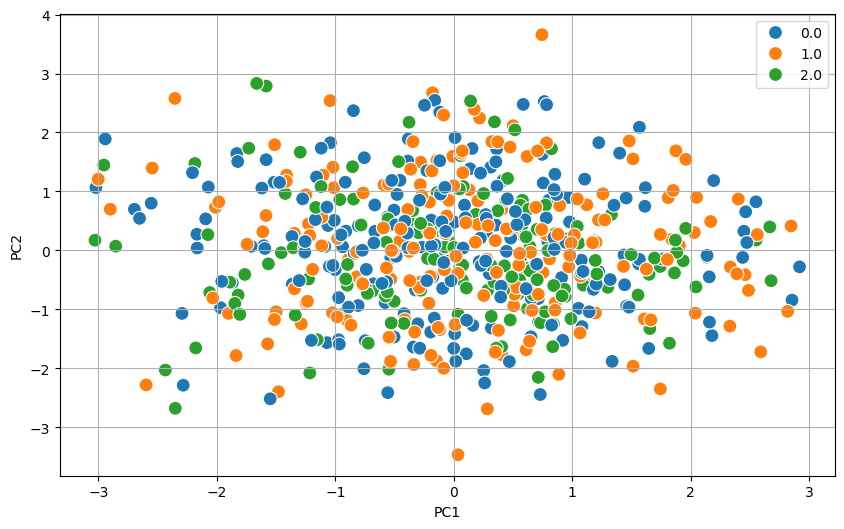

In [20]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df['Cluster'] = df_filtered['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.grid()
plt.show()

## Вывод
В ходе выполнения лабораторной работы мы добавили в наш датасет новый атрибут, который зависит от других атрибутов. Затем мы обработали датасет, удалили пропущенные значения, а также выбросы. После построения графиков зависимости переменных друг от друга, мы применили метод K-Means к кластерам, а затем визуализировали их. По самому графику можно сказать, что большая часть кластеров сгруппирована друг с другом, но также имеются кластеры, которые расположены на большом расстоянии от других, это говорит о степени различии данных внутри них.